In [42]:
import json
import matplotlib.pyplot as plt
import numpy as np
# read JSON
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# extract data
def extract_data(data, metric):
    results = {}
    methods = set()
    for item in data:
        database = item['Name']
        for method, method_results in item['Methods'].items():
            if database not in results:
                results[database] = {}
            results[database][method] = method_results[metric]
            methods.add(method)
    return results, methods


def plot_results(small_data, large_data, methods, title, ylabel):
    fig, axs = plt.subplots(2, 1, figsize=(12, 16))

    databases = list(small_data.keys())
    x = np.arange(len(databases)) # to use as plot location
    bar_width = 0.1

    # Plot small dataset
    ax = axs[0]
    for i, method in enumerate(sorted(methods)):
        values = [small_data[database].get(method, 0) for database in databases]
        if any(values):
            ax.bar(x + i * bar_width, values, bar_width, label=method)
    
    ax.set_xticks(x + bar_width * (len(methods) - 1) / 2)
    ax.set_xticklabels(databases)
    ax.set_xlabel('Vector Database Frameworks')
    ax.set_ylabel(ylabel)
    ax.set_title(f'{title} (Small Data)')
    ax.legend()
    ax.grid(True)

    # Plot large dataset
    ax = axs[1]
    for i, method in enumerate(sorted(methods)):
        # Make a list of method result for every database
        values = [large_data[database].get(method, 0) for database in databases]
        if any(values):
            ax.bar(x + i * bar_width, values, bar_width, label=method)

    ax.set_xticks(x + bar_width * (len(methods) - 1) / 2)
    ax.set_xticklabels(databases)
    ax.set_xlabel('Vector Database Frameworks')
    ax.set_ylabel(ylabel)
    ax.set_title(f'{title} (Large Data)')
    ax.legend()
    ax.grid(True)
    
    plt.show()


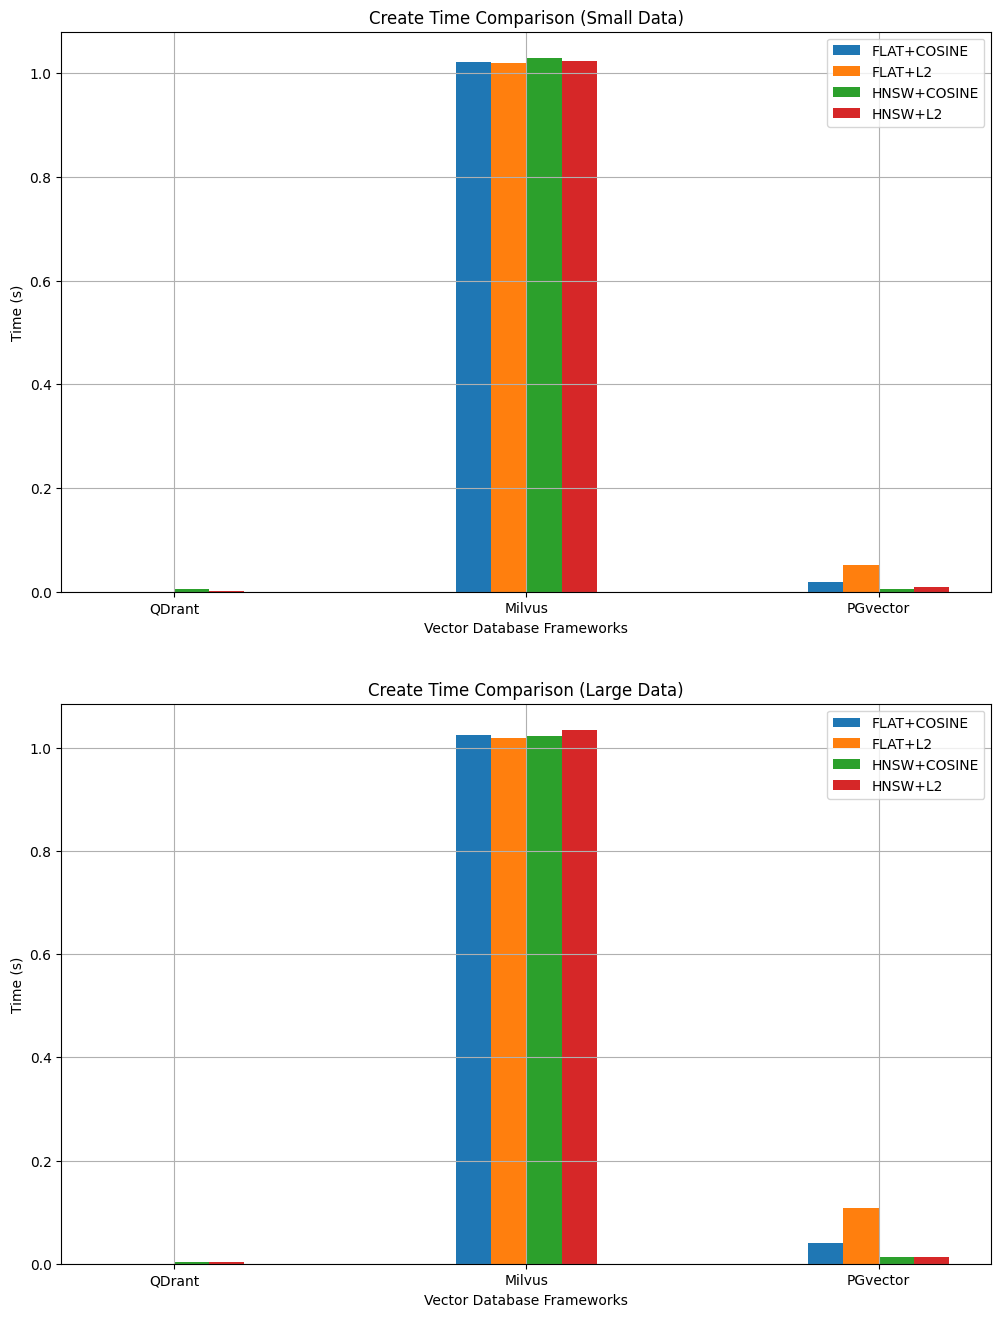

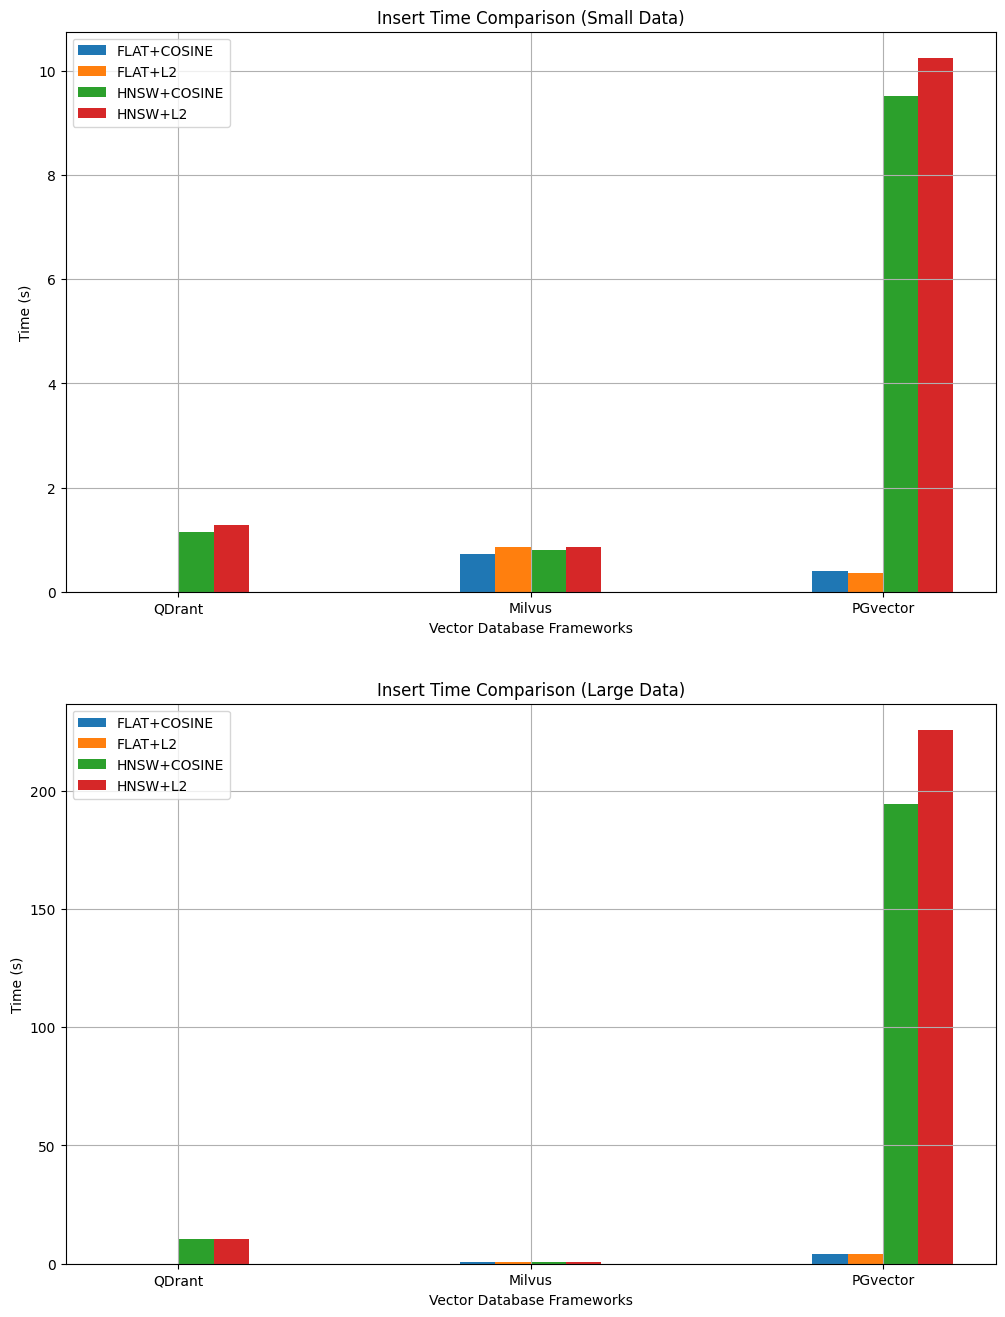

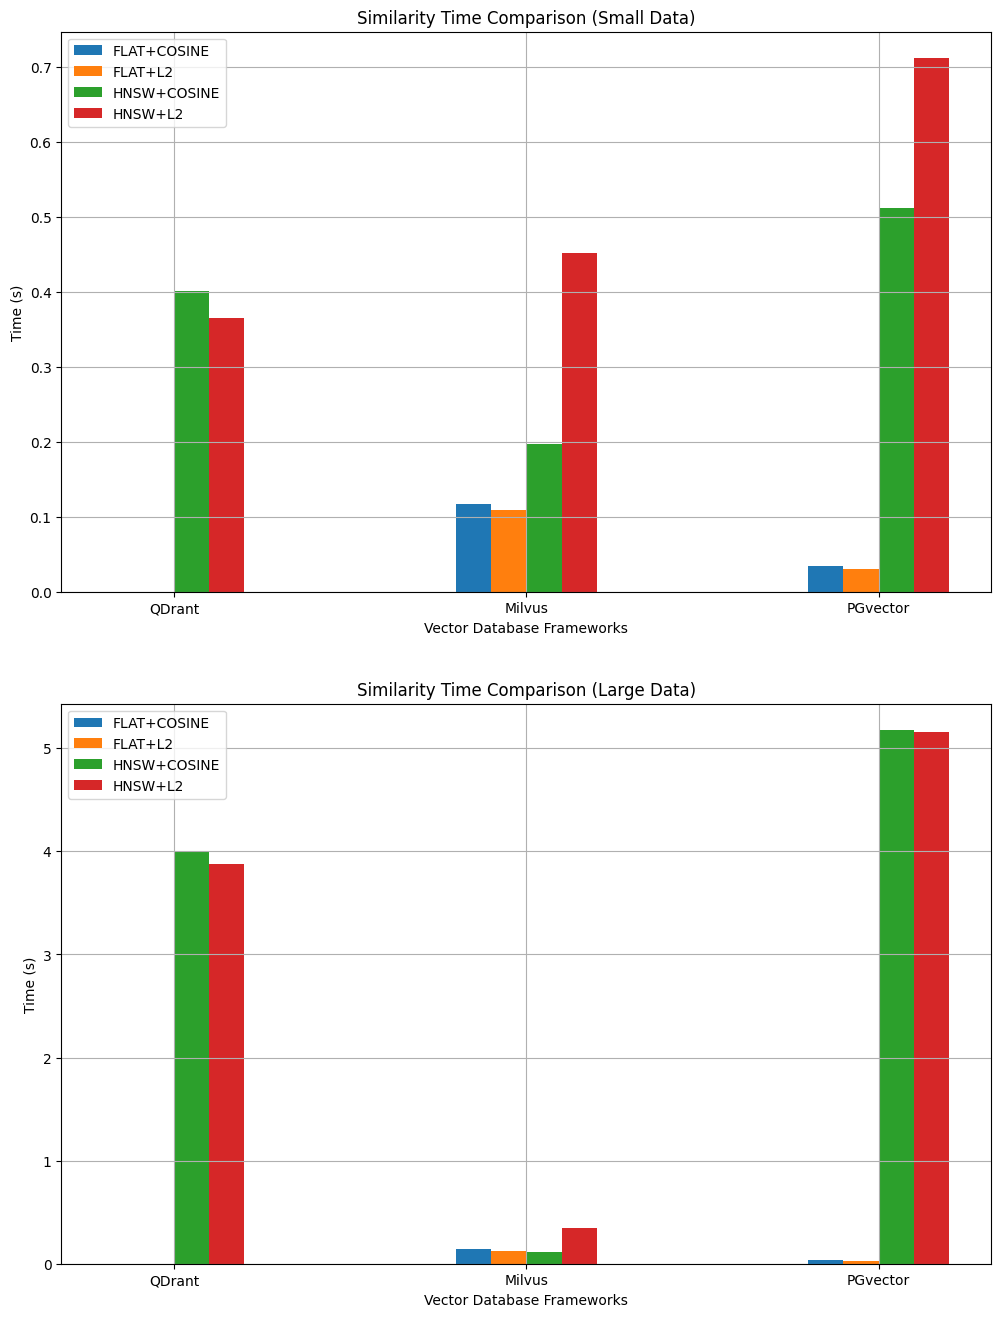

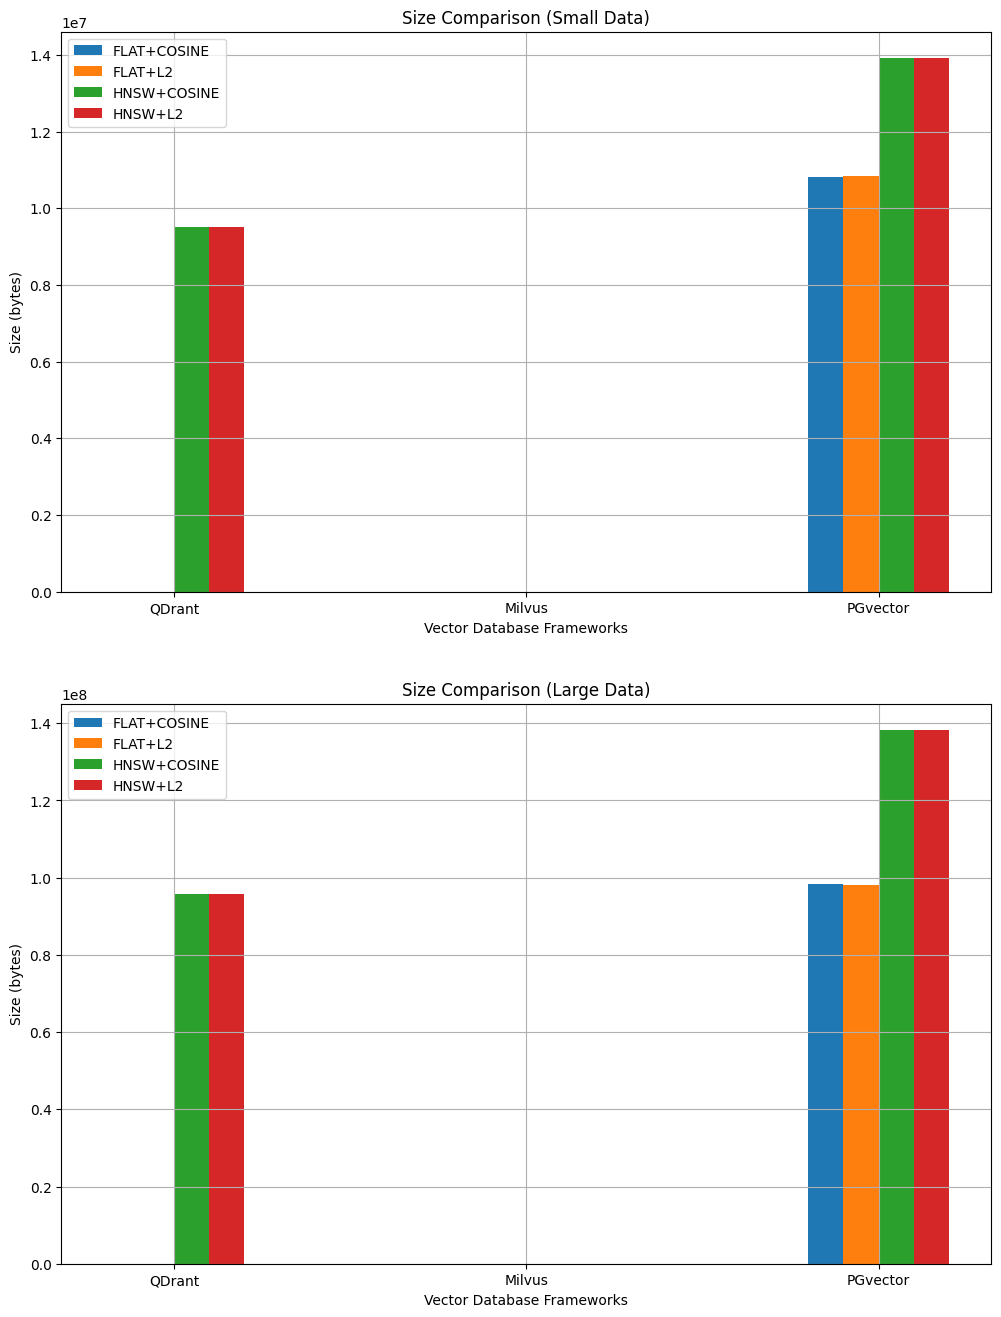

In [43]:
small_path = './result/result_small.json'
normal_path = './result/result.json'

data1 = read_json(small_path)
data2 = read_json(normal_path)

metrics_labels = {
    'create_time': ('Create Time Comparison', 'Time (s)'),
    'insert_time': ('Insert Time Comparison', 'Time (s)'),
    'similarity_time': ('Similarity Time Comparison', 'Time (s)'),
    'size': ('Size Comparison', 'Size (bytes)')
}

for metric, (title, ylabel) in metrics_labels.items():
    data1_extracted, methods1 = extract_data(data1, metric)
    data2_extracted, methods2 = extract_data(data2, metric)
    plot_results(data1_extracted, data2_extracted, methods1, title, ylabel)